In [11]:
import numpy as np
import matplotlib.pyplot as plt
from modAL.models import ActiveLearner
from sklearn.ensemble import RandomForestClassifier
import pickle

## Active Learning Example in modAL framework

In [20]:
# alldata_dict = collections.defaultdict(dict)
with (open("positive_samples.pickle", "rb")) as openfile:
    while True:
        try:
            positive_xy= pickle.load(openfile)
        except EOFError:
            break

In [21]:
positive_xy

{'b827eb0d8af7': ['1485198017.91', '1485163671.07'],
 'b827eb0fedda': ['1497928649.89', '1480740512.58'],
 'b827eb122f0f': ['1498892374.76', '1498261062.11'],
 'b827eb1685c7': ['1499724045.58', '1486212620.04'],
 'b827eb2a1bce': ['1487029980.37', '1487018417.81'],
 'b827eb429cd4': ['1488836836.42', '1488810598.15'],
 'b827eb42bd4a': ['1495845294.38', '1495820507.31'],
 'b827eb44506f': ['1486149582.98', '1499473078.4'],
 'b827eb4e7821': ['1483014176.71', '1483015339.86'],
 'b827eb5895e9': ['1490690898.85', '1490686108.53'],
 'b827eb815321': ['1482308965.46', '1482399908.63'],
 'b827eb86d458': ['1487000875.51', '1487028598.04'],
 'b827eb8e2420': ['1500149760.47', '1500173615.97'],
 'b827eb9bed23': ['1491297344.73', '1491323380.55'],
 'b827ebad073b': ['1480303515.84', '1480297488.98']}

In [17]:
positive_xy[0]

array([149,  25, 123,  52, 255,  61, 138,  80, 101, 216, 211,  53, 158,
       197, 140,  63, 137, 126, 182,  87,  32, 255,  98, 119, 131, 139,
       131, 151,  40,  97, 149, 208,  50, 122,  73, 127, 192,  37,   0,
       196, 188, 107,  33, 124,  41, 169,  10, 154,  94, 255, 251,  41,
        81, 101, 105, 105, 198,   0, 161, 129, 158, 145,   0, 239, 112,
       160, 231, 124, 187,   0, 118, 130, 255, 118, 119, 103, 124, 165,
       112, 255,   0, 219, 219,  31,  98,  65, 165, 191, 158, 119,  93,
       213, 255, 156, 154, 229,   0,   0, 249, 192, 233,   0, 127,  54,
         0, 140, 255, 186, 178, 221, 255, 255,   0, 168, 215,   0,  75,
       226, 133, 154, 225,  87,  87, 170, 255,  71,   0, 255,   1])

In [14]:
negative_mock = np.full(shape=(910,128), dtype=int)

In [15]:
negative_mock

array([[                0,        4319164992,            939275, ...,
        15199648742375424,                 0, 39406496739491840],
       [71776119061217280, 52354345668182016, 50102545854496768, ...,
        34339947158700032, 13229323905400832,                 0],
       [12103423998558208, 71776119061217280, 53480245575024640, ...,
         7036874417766400, 56294995342131200, 17732923532771328],
       ..., 
       [                0,  7599824371187712, 71776119061217280, ...,
        66991044457136128, 70931694131085312,  4222124650659840],
       [71776119061217280,                 0,  6192449487634432, ...,
        44473046320283648, 27866022694354944, 54887620458577920],
       [                0, 42502721483309056,                 0, ...,
         8162774324609024, 30680772461461504, 63894819713318912]])

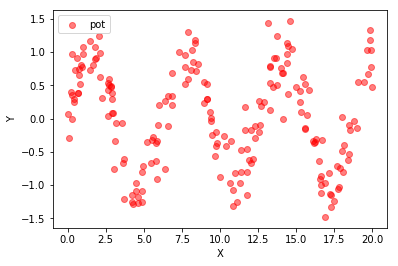

In [3]:
plt.scatter(X, y, c="r", alpha=0.5, label="pot")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc=2)
plt.show()

For active learning, we shall define a **custom query strategy** tailored to Gaussian processes(for this example). 

In a nutshell, a **query stategy** in modAL is a function taking (at least) **two** arguments, outputting the index of the queried instance and the instance itself. In our case, the arguments are *regressor* and X.

Two arguments:
- an estimator object
- a pool of examples  



In [4]:
def AL_RandomForestClassifier(rdf, X):
    _, std = rdf.predict(X, return_std=True)
    query_idx = np.argmax(std)
    return query_idx, X[query_idx]

In [6]:
n_initial = 5
initial_idx = np.random.choice(range(len(X)), size=n_initial, replace=False)
X_training, y_training = X[initial_idx], y[initial_idx]

In [5]:


rdf = ActiveLearner(
    estimator=RandomForestClassifier(n_estimators=10),
    query_strategy=AL_RandomForestClassifier,
    X_training=X_training.reshape(-1, 1), y_training=y_training.reshape(-1, 1)
)

/Users/lizichen1/anaconda/envs/py36/lib/python3.6/site-packages/modAL/models.py:157: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(self.X_training, self.y_training, **fit_kwargs)


ValueError: Unknown label type: 'continuous'

In [ ]:
# plotting the initial estimation
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(14, 7))
    x = np.linspace(0, 20, 1000)
    pred, std = rdf.predict(x.reshape(-1,1), return_std=True)
    plt.plot(x, pred)
    plt.fill_between(x, pred.reshape(-1, ) - std, pred.reshape(-1, )+std, alpha=0.2)
    plt.scatter(X, y, c='k')
    plt.title('Initial estimation based on %d points' % n_initial)
    plt.show()

In [ ]:
# active learning
n_queries = 10
for idx in range(n_queries):
    query_idx, query_instance = regressor.query(X)
    regressor.teach(X[query_idx].reshape(1, -1), y[query_idx].reshape(1, -1))

In [ ]:
# plotting after active learning
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(14, 7))
    x = np.linspace(0, 20, 1000)
    pred, std = regressor.predict(x.reshape(-1,1), return_std=True)
    plt.plot(x, pred)
    plt.fill_between(x, pred.reshape(-1, )-std, pred.reshape(-1, )+std, alpha=0.2)
    plt.scatter(X, y, c='k')
    plt.title('Estimation after %d queries' % n_queries)
    plt.show()